In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Day23~25: 滑鼠事件

# Day23: 滑鼠事件-標記小工具

In [37]:
def show_img(img):
    copy_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(copy_img)
    plt.show()

In [3]:
src = cv2.imread('C:\\Users\\USER\\Pictures\\Wallpaper\\164156003_x3.jpg')

In [14]:
# event：鼠標事件名稱，通過該值可以獲取鼠標進行的何種事件操作。
# x, y：鼠標進行事件操作一瞬間，所在的坐標位置。
# flags：指的是與 event 相關的實踐中包含 FLAG 的事件。
# data：傳遞進來的參數。

def mouse_handler(event, x, y, flags, data):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(data['image'],(x, y), 10, (0,0, 255), -1)
        cv2.imshow("Image",data['image'])
        
        data['points'].append((x,y))
        print("(",x,",",y,")")

In [38]:
def get_points(img):
    # 宣告空矩陣data，裡面有image和point兩個欄位
    data = {}
    data['image'] = img.copy()
    data['points'] = []

    #h, w, dim = img.shape
    #cv2.resizeWindow("Image", w, h)
    #print("Img height, width: ({}, {})".format(h, w))
    cv2.namedWindow("Image",cv2.WINDOW_AUTOSIZE)
    cv2.imshow("Image",img)

    #滑鼠點擊事件
    cv2.setMouseCallback("Image", mouse_handler, data)

    cv2.waitKey(0)  
    cv2.destroyAllWindows()
    
    return data['points']

In [6]:
# main
points = get_points(src)

# Day24: 滑鼠事件-文件掃描工具

( 58 , 40 )
( 454 , 45 )
( 468 , 361 )
( 53 , 353 )


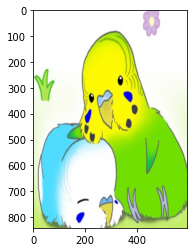

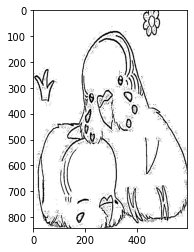

In [51]:
points = get_points(src)
ori_points = np.float32(points)

# other case:取兩點對角線
ori_points_x = ori_points[0,0]
ori_points_y = ori_points[0,1]
ori_points_x1 = ori_points[1,0]
ori_points_y1= ori_points[1,1]
test_ori_img = np.float32([[ori_points_x,ori_points_y],[ori_points_x1,ori_points_y],[ori_points_x,ori_points_y1],[ori_points_x1,ori_points_y1]])
#print(test_ori_img)

#A4大小格式
A4_height = 842
A4_width = 595
A4_points = np.float32([[0,0],[A4_width,0],[A4_width,A4_height],[0,A4_height]]) #從座標(0,0)開始，採逆時鐘的四個點

#轉換矩陣計算
M = cv2.getPerspectiveTransform(ori_points, A4_points)
dst = cv2.warpPerspective(src,M,(A4_width,A4_height))
show_img(dst)

#二值化黑白圖像
gray_img = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
img2 = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
show_img(img2)


# Day25: 滑鼠事件-胡亂P圖

In [67]:
org_backsrc = cv2.imread('C:\\Users\\USER\\Pictures\\meme\\Pedobear-pedo-bear-29034476-600-445.jpg')
org_src = cv2.imread('C:\\Users\\USER\\Pictures\\Wallpaper\\164156003_x3.jpg')

( 62 , 35 )
( 539 , 34 )
( 541 , 382 )
( 61 , 381 )


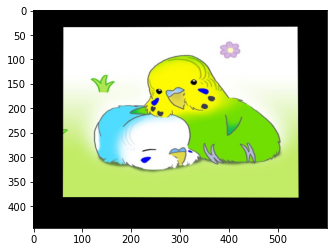

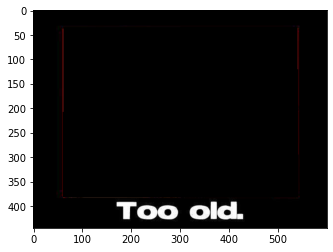

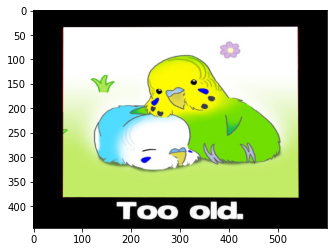

In [65]:
points = get_points(org_backsrc)
org_backsrc_points = np.float32(points)

h,w,z = org_src.shape
org_src_point = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]])

#轉換矩陣
M = cv2.getPerspectiveTransform(org_src_point, org_backsrc_points)
dst = cv2.warpPerspective(org_src,M,(org_backsrc.shape[1],org_backsrc.shape[0]))
show_img(dst)

#將背景遮蓋處用黑色填滿
cv2.fillConvexPoly(org_backsrc,org_backsrc_points.astype(int),(0,0,0))
show_img(org_backsrc)

#背景和圖像合併
p_img = cv2.add(org_backsrc,dst)
show_img(p_img)


( 60 , 35 )
( 542 , 32 )
( 541 , 384 )
( 65 , 382 )


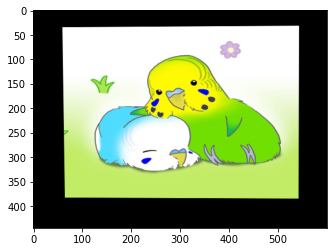

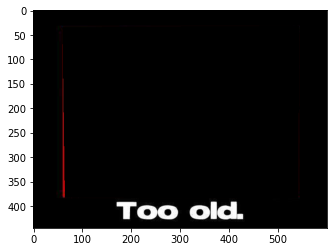

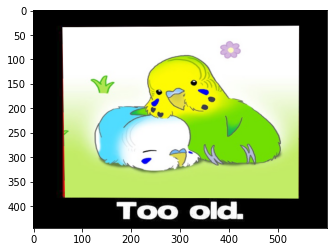

In [68]:
## other: 不同的矩陣儲存方式&轉換矩陣公式
points = get_points(org_backsrc)
org_backsrc_points = np.vstack(points).astype(float)

h,w,z = org_src.shape
org_src_point = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]],dtype = float)

#轉換矩陣
M, status = cv2.findHomography(org_src_point, org_backsrc_points)
dst = cv2.warpPerspective(org_src,M,(org_backsrc.shape[1],org_backsrc.shape[0]))
show_img(dst)

#將背景遮蓋處用黑色填滿
cv2.fillConvexPoly(org_backsrc,org_backsrc_points.astype(int),(0,0,0))
show_img(org_backsrc)

#背景和圖像合併
p_img = cv2.add(org_backsrc,dst)
show_img(p_img)